<a href="https://colab.research.google.com/github/Naquivillagra/data-science/blob/main/No_Supervisado_Grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Aprendizaje No Supervisado- Edición 2022**

# GRUPO 1

**Integrantes:** 


*   Laura Ailin Feu Marquestau
*   Matias Miguel Mengual Figueroa 
*   Marcelo Perea
*   Natalia Giselle Tassin
*   Ignacio Villagra Torcomian

## Consignas

1- Análisis exploratorio de la base.

2- Evaluación visual e intuitiva de a dos variables numéricas por vez. 

3- Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros 

4- Evaluación y Análisis de los clusters encontrados. 

5- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ? 

6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.



## Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import os

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
import plotly.express as px


In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

## Preparación-de-los-datos

Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/menguelx7/Diplodatos/main/Aprendizaje_no_Supervisado/players_22.csv') 

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#df = pd.read_csv(io.BytesIO(uploaded['players_22.csv']))

In [ ]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0       93         93   78000000.0  320000.0   34  1987-06-24        170   
1       92         92  119500000.0  270000.0   32  1988-08-21        185   
2       91         91   45000000.0  270000.0   36  1985-02-05        187   
3       91         91  129000000.0  270000.0   29  1992-02-05        175   
4       91         91  125500000.0  350000.0   30  1991-06-28        181   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   
4         70          10.0      Manchester City  English Premier League   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   
4           1.0           RCM                17.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   
3  2017-08-03                     2025.0              54           Brazil   
4  2015-08-30                     2025.0               7          Belgium   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   
4          1325.0             RCM                   7.0          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   
4          5            4                         4    High/High    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   
4       Yes         232200000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shoote

## 1.-Análisis exploratorio de la base

In [ ]:
df.shape

(19239, 110)

In [ ]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [ ]:
df.describe()

sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863179      7.069434   54401.868535      0.747865   
min       16.000000    155.000000     49.000000       1.000000      1.000000   
25%       21.000000    176.000000     70.000000     479.000000      1.000000   
50%       25.000000    181.000000     75.000000    1938.000000      1.000000   
75%       29.000000    186.000000     80.000000  111139.000000      1.000000   
max       54.000000    206.000000    110.000000  115820.000000      5.000000   

       club_jersey_number  club_contract_valid_until  nationality_id  \
count        19178.000000               19178.000000    19239.000000   
mean            20.945250                2022.764000       58.602682   
std             17.909369                   1.213203       50.298614   
min              1.000000                2021.000000        1.000000   
25%              9.000000                2022.000000       21.000000   
50%             18.000000                2022.000000       45.000000   
75%             27.000000                2024.000000       60.000000   
max             99.000000                2031.000000      219.000000   

       nation_team_id  nation_jersey_number     weak_foot   skill_moves  \
count      759.000000            759.000000  19239.000000  19239.000000   
mean     14480.848485             12.567852      2.946151      2.352461   
std      35328.730217              7.039116      0.671560      0.767659   
min       1318.000000              1.000000      1.000000      1.000000   
25%       1338.000000              7.000000      3.000000      2.000000   
50%       1357.000000             12.000000      3.000000      2.000000   
75%       1386.000000             19.000000      3.000000      3.000000   
max     111473.000000             28.000000      5.000000      5.000000   

       international_reputation  release_clause_eur          pace  \
count              19239.000000        1.806300e+04  17107.000000   
mean                   1.094184        5.374044e+06     68.213071   
std                    0.371098        1.494837e+07     10.933155   
min                    1.000000        1.600000e+04     28.000000   
25%                    1.000000        8.060000e+05     62.000000   
50%                    1.000000        1.600000e+06     69.000000   
75%                    1.000000        3.700000e+06     76.000000   
max                    5.000000        3.735000e+08     97.000000   

           shooting       passing     dribbling     defending        physic  \
count  17107.000000  17107.000000  17107.000000  17107.000000  17107.000000   
mean      52.345297     57.312562     62.561174     51.703630     64.823289   
std       14.051623     10.068965      9.651312     16.189746      9.791886   
min       18.000000     25.000000     27.000000     14.000000     29.000000   
25%       42.000000     51.000000     57.000000     37.000000     59.000000   
50%       54.000000     58.000000     64.000000     56.000000     66.000000   
75%       63.000000     64.000000     69.000000     64.00000

In [ ]:
df.isna().sum()

sofifa_id                          0
player_url                         0
short_name                         0
long_name                          0
player_positions                   0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
dob                                0
height_cm                          0
weight_kg                          0
club_team_id                      61
club_name                         61
league_name                       61
league_level                      61
club_position                     61
club_jersey_number                61
club_loaned_from               18137
club_joined                     1163
club_contract_valid_until         61
nationality_id                     0
nationality_name                   0
nation_team_id                 18480
nation_position                18480
nation_jersey_number           18480
p

47


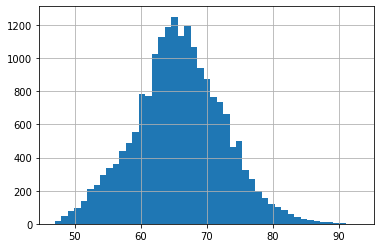

In [ ]:
nbins=1*(df.overall.max()-df.overall.min())+1
df['overall'].hist(bins = nbins)
print(nbins)

In [ ]:
df.player_positions.nunique()

674

Contamos la cantidad de jugadores que hay por posición

In [ ]:
df.player_positions.value_counts()

CB              2423
GK              2132
ST              1770
CDM, CM          953
CM               726
CM, CDM          687
LB               616
RB               576
CB, RB           295
CDM              294
CAM, CM          249
CB, LB           232
CAM              219
LB, LM           206
LM               206
CM, CAM          203
CB, CDM          202
RM, LM           196
RM               196
LM, RM           168
RB, RM           158
RB, LB           137
RB, CB           131
LB, LWB          129
LB, CB           121
CDM, CB          119
RW               116
ST, LW           114
RB, RWB          112
ST, LM           103
ST, RM           101
ST, RW            98
CM, CDM, CAM      98
RW, LW            92
ST, CAM           91
LW, RW            91
LW                89
LM, ST            78
RM, RW            76
ST, CF            75
CDM, CM, CB       71
LM, LW            71
CAM, RM           70
RWB, RB           68
LWB, LB           66
CAM, LM           64
RM, ST            64
LM, CAM      

Miramos ahora los mejores jugadores por posicion, usando las variables 'overall' y 'player_positions'.

In [ ]:
best_players_per_position=df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['player_positions','short_name','overall']]
best_players_per_position

player_positions           short_name  overall
28                 CAM      Bruno Fernandes       88
2052          CAM, CDM            P. Kasami       74
2711      CAM, CDM, CM          A. Ricaurte       73
1589      CAM, CDM, LM       Álex Fernández       75
8515      CAM, CDM, RM           M. Miranda       67
7408      CAM, CDM, ST             V. Lobry       68
79             CAM, CF              M. Reus       85
69         CAM, CF, CM             A. Gómez       85
736        CAM, CF, LM            A. Younes       78
3127       CAM, CF, LW        F. Forestieri       72
3092       CAM, CF, RM            A. Sâyoud       73
6327       CAM, CF, RW            H. Novick       69
1596       CAM, CF, ST               M. Uth       75
72             CAM, CM          David Silva       85
277       CAM, CM, CDM          T. Ndombele       82
108        CAM, CM, CF         Luis Alberto       84
894        CAM, CM, LM           M. Lanzini       77
210        CAM, CM, LW                Oscar       82
13645     CAM, CM, LWB      R. Charles-Cook       62
797        CAM, CM, RM           A. Fulgini       78
65         CAM, CM, RW       Bernardo Silva       86
3601      CAM, CM, RWB         M. Gaćinović       72
2605       CAM, CM, ST     S. van de Streek       73
234            CAM, LM        H. Çalhanoğlu       82
4427       CAM, LM, CF              R. Hack       71
844        CAM, LM, CM       C. Baumgartner       78
486        CAM, LM, LW       Laure Santeiro       80
590        CAM, LM, RM      F. Bernardeschi       79
4260       CAM, LM, RW          C. Gonzáles       71
651        CAM, LM, ST        Matheus Cunha       79
444            CAM, LW            Q. Promes       80
5226       CAM, LW, CF            R. Schmid       70
139        CAM, LW, CM             P. Foden       84
14828      CAM, LW, LB       Adrián Bernabé       61
820        CAM, LW, LM               Brahim       78
433        CAM, LW, RW         K. Fortounis       80
1221       CAM, LW, ST           N. Sansone       76
5073           CAM, RB        Heltinho Melo       70
189            CAM, RM      Ronaldo Cabrais       83
10981      CAM, RM, CF             M. Watai       65
1942       CAM, RM, CM         M. Ihattaren       75
150        CAM, RM, LM              Muniain       83
3569       CAM, RM, RB       Kauã Abranches       72
35         CAM, RM, RW            T. Müller       87
11203     CAM, RM, RWB         J. Wießmeier       64
131        CAM, RM, ST             N. Fekir       84
518            CAM, RW              M. Özil       79
7083       CAM, RW, CF          E. Brignola       68
3042       CAM, RW, CM       Y. Verschaeren       73
3166       CAM, RW, LW             P. Mpoku       72
13170      CAM, RW, RM   Francisco Teixeira       63
4417       CAM, RW, ST       A. Guðmundsson       71
11478     CAM, RWB, CM             R. Broom       64
209            CAM, ST            L. Stindl       82
12850     CAM, ST, CDM           M. Radecki       63
2648       CAM, ST, CF        Marcos Júnior       73
548        CAM, ST, CM              Rodrigo       79
2168       CAM, ST, LM           S. Adamyan       74
940        CAM, ST, LW            G. Defrel       77
4288       CAM, ST, RM     Carleto Costinha       71
3440       CAM, ST, RW             M. Aramu       72
15                  CB          V. van Dijk       89
7114           CB, CAM          K. Yamamura       68
39             CB, CDM           Marquinhos       87
2004       CB, CDM, CM       I. Radovanović       74
214        CB, CDM, LB             D. Blind       82
5017       CB, CDM, RB            R. Oxford       70
13568           CB, CF         Kim Dae Jung       62
742             CB, CM             R. Saïss       78
636        CB, CM, CDM             Zubeldia       79
9931        CB, CM, RB          R. Padovani       65
107             CB, LB             D. Alaba       84
649        CB, LB, CDM          L. Martínez       79
5723        CB, LB, CM            K. Wimmer       69
1161        CB, LB, LM         

Mejores equipos de acuerdo al "overall" promedio.

In [ ]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(10)

club_name    overall
368             Juventus  79.961538
470  Paris Saint-Germain  79.454545
358                Inter  78.857143
241    FC Bayern München  78.071429
412    Manchester United  78.000000
509       Real Madrid CF  77.757576
434               Napoli  77.500000
63              Atalanta  77.480000
512        Real Sociedad  77.280000
546           SL Benfica  76.931034

##  2.-Evaluación visual e intuitiva de a dos variables numéricas por vez.

In [ ]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)]


In [ ]:
#df_n[df_n['player_positions']== 'GK'].isna().sum()

In [ ]:
skills_ratings = ['pace', 'shooting', 'passing', 'dribbling',
                  'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                  'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
                  'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 
                  'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
                  'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle','defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed'
                  ]

In [ ]:
len(skills_ratings)

41

Hay 41 variables numéricas de desempeño según habilidad

In [ ]:
df_skills=df_n[skills_ratings] #creamos la base solo con las habilidades.

In [ ]:
#data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[0] 
skill_2=skills_ratings[1]   

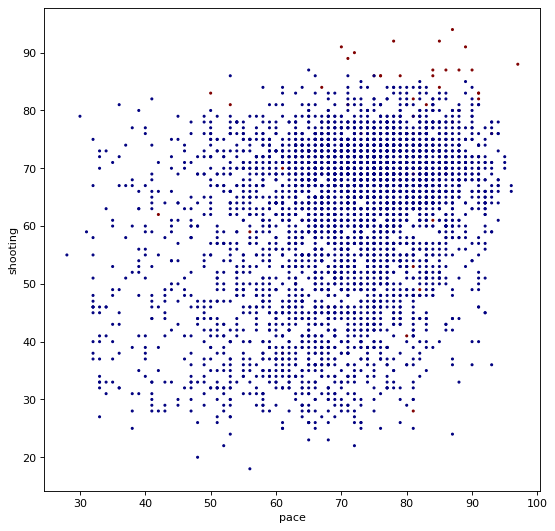

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

In [ ]:
bool_GK=df_n["player_positions"] == 'GK' #diferenciamos a los arqueros

Graficamos de a dos variables a la vez entre las primeras habilidades de la lista para ver si emergen algunos clusters visualmente

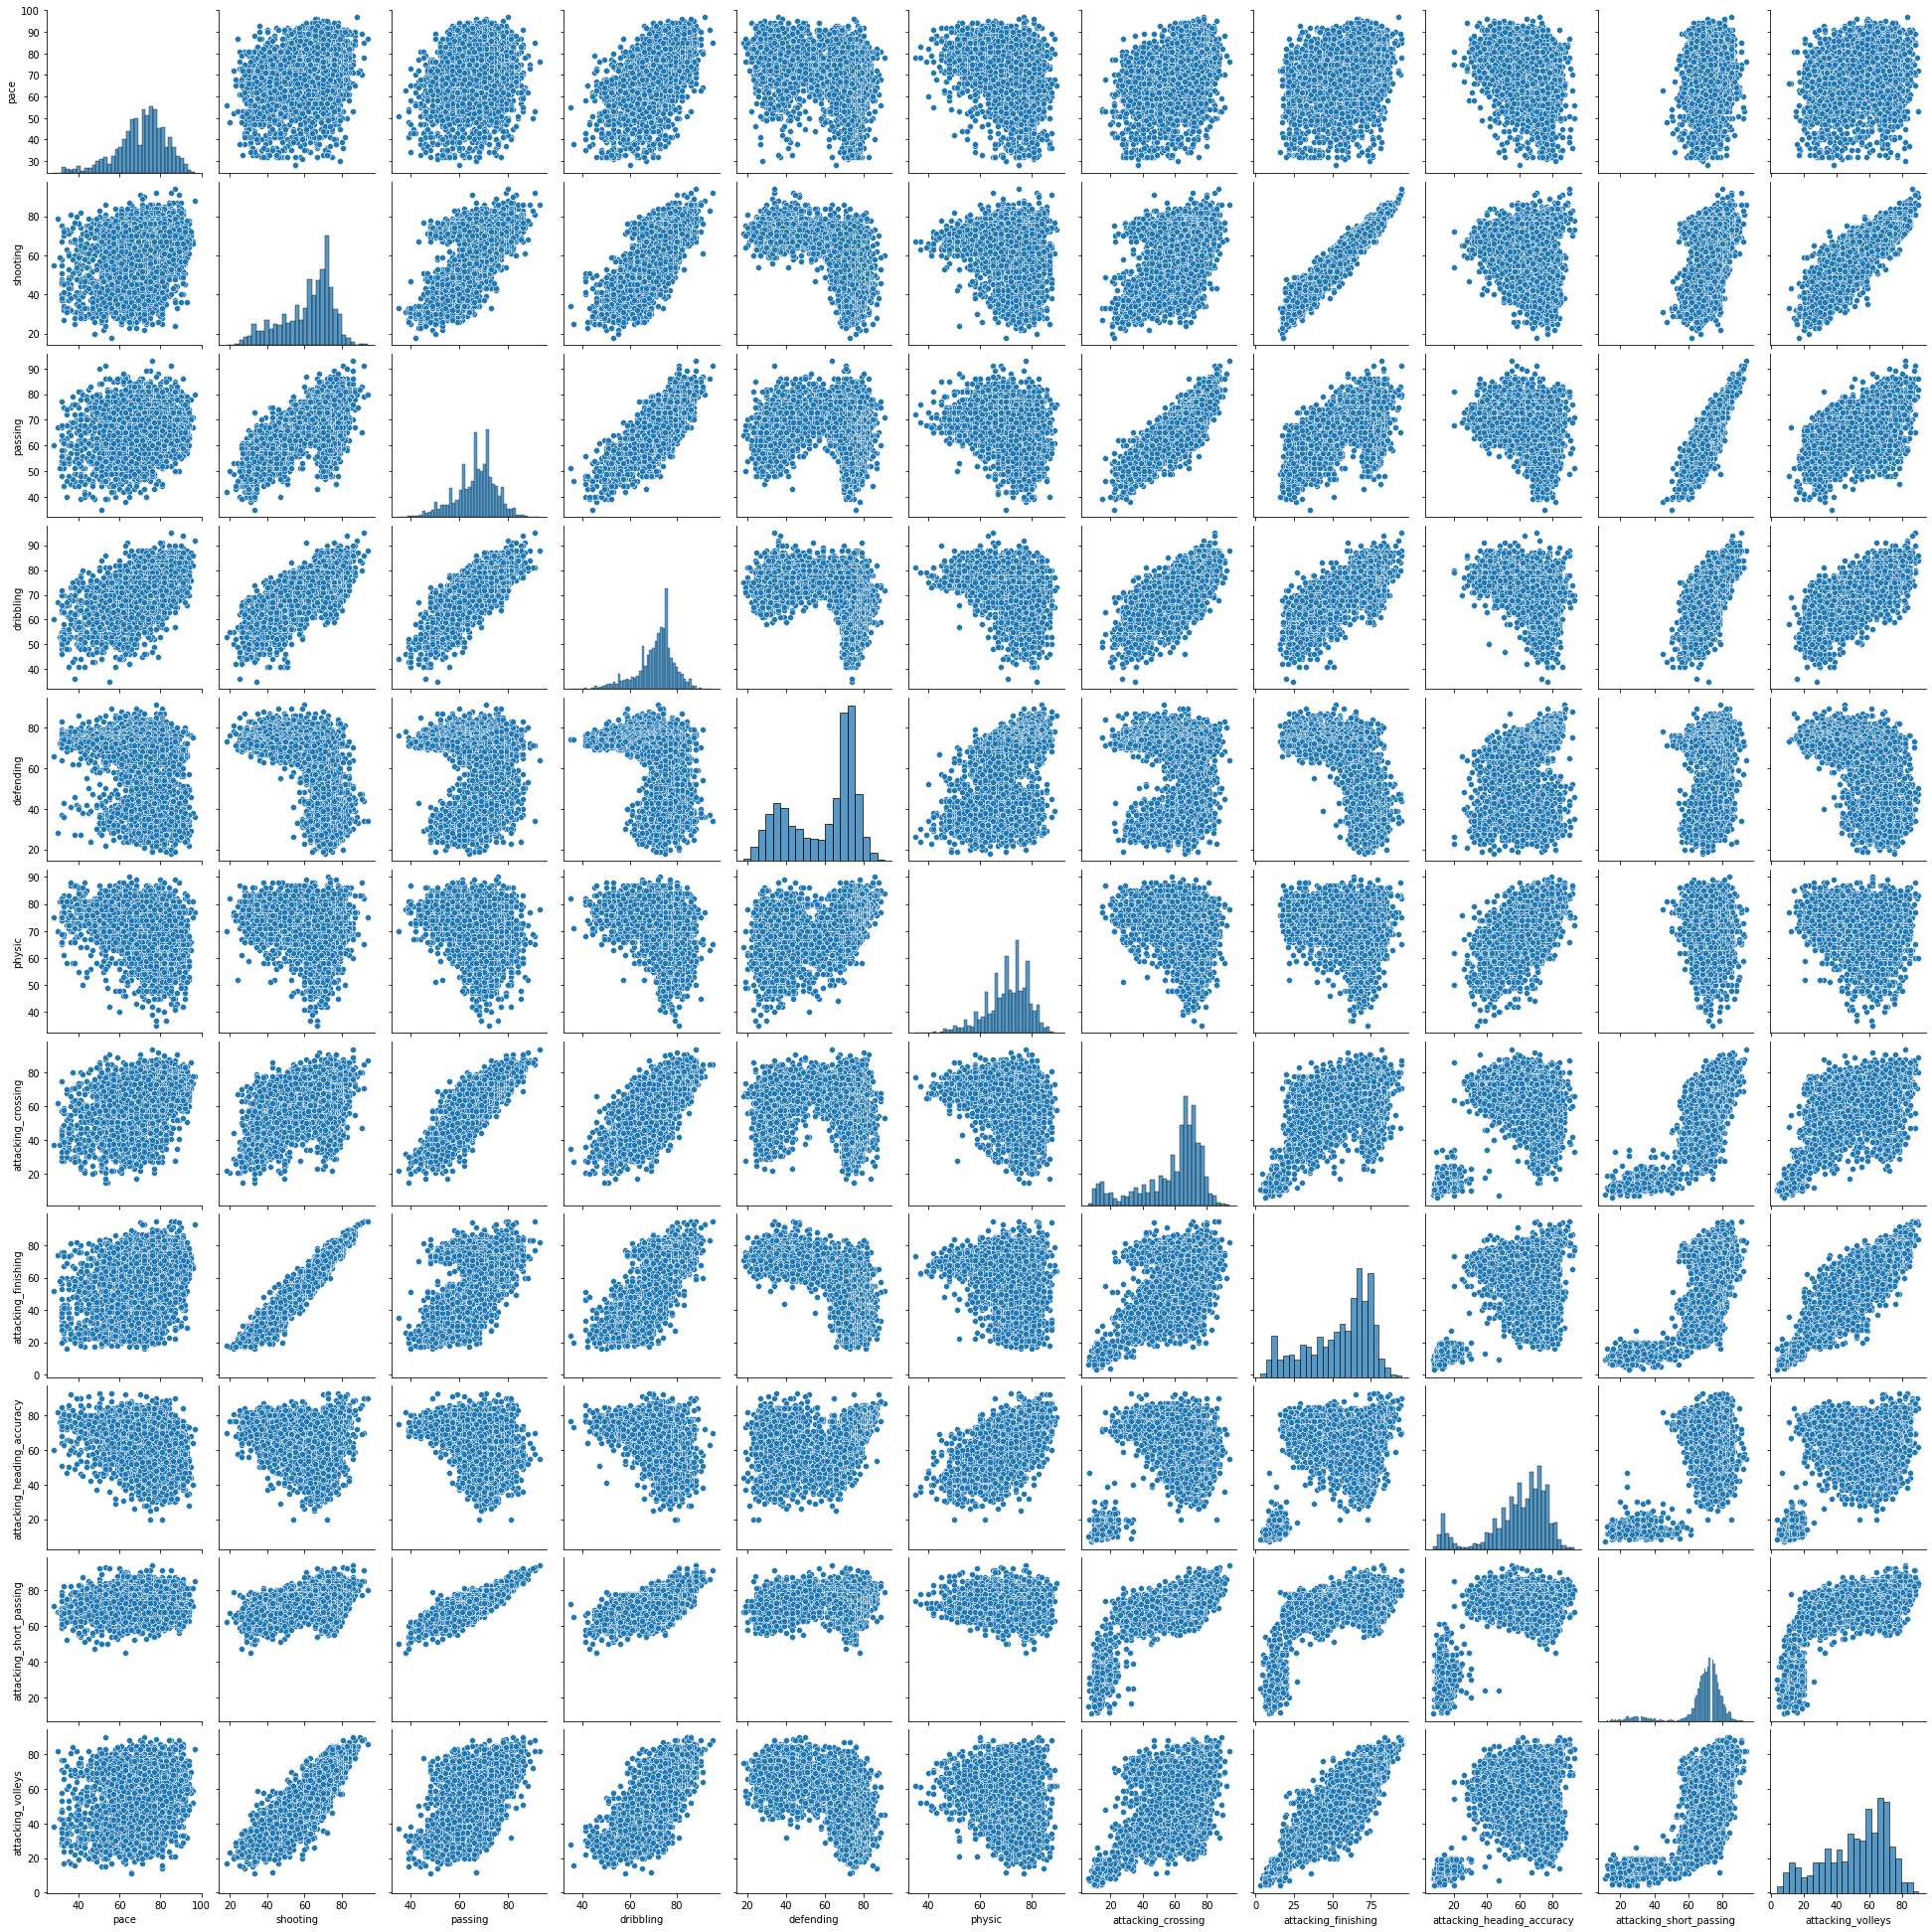

In [ ]:
sns.pairplot(df_skills[skills_ratings[0:11]])

En algunas de estas gráficas se puede observar perfectamente cómo un grupo de observaciones se seprar del resto. Podemos suponer que este grupo separado corresponde a los arqueros.

In [ ]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

fig.show(renderer="colab")


In [ ]:
graf2 = go.Scatter(x=df_skills['defending'], y=df_skills['attacking_crossing'],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,'defending'], y=df_skills.loc[bool_crack,'attacking_crossing'],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf2,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title='defending'),
                yaxis=dict(title='attacking_crossing'),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

fig.show(renderer="colab")

##  3.-Clustering

In [ ]:
df_n.shape

(4593, 110)

En primer lugar, vamos a eliminar del análisis a los arqueros (GK), ya que por su posición, tienen habilidades muy diferentes al resto de los jugadores de campo

In [ ]:
df_noGK = df_n[df_n["player_positions"] != 'GK']

In [ ]:
df_noGK.shape

(4149, 110)

In [ ]:
df_skills.shape

(4593, 41)

In [ ]:
# sacamos también de la base de habilidades a los arqueros
df_skills_noGK = df_skills[df_n["player_positions"] != 'GK']

In [ ]:
df_skills_noGK = df_skills_noGK.drop(['goalkeeping_speed', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes' ], axis=1)

In [ ]:
df_skills_noGK.isna().sum()

pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_aggression           0
mentality_interceptions        0
mentality_positioning          0
mentality_vision               0
mentality_

### K Means

In [ ]:
# Número de clusters buscado. Elegimos 6 clusters pensando en las posiciones principales de fútbol (sin contar a los arqueros): Laterales, defensores centrales, volantes internos, volantes externos, delanteros externos y delanteros centrales
n_clust = 6

km = KMeans(n_clusters=n_clust)
km.fit(df_skills_noGK)

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

In [ ]:
df_clusters=df_noGK.copy()
df_clusters['kmeans_6'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head()

Kmeans encontró:  6 clusters, nosotros forzamos la cantidad


sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0       93         93   78000000.0  320000.0   34  1987-06-24        170   
1       92         92  119500000.0  270000.0   32  1988-08-21        185   
2       91         91   45000000.0  270000.0   36  1985-02-05        187   
3       91         91  129000000.0  270000.0   29  1992-02-05        175   
4       91         91  125500000.0  350000.0   30  1991-06-28        181   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   
4         70          10.0      Manchester City  English Premier League   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   
4           1.0           RCM                17.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   
3  2017-08-03                     2025.0              54           Brazil   
4  2015-08-30                     2025.0               7          Belgium   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   
4          1325.0             RCM                   7.0          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   
4          5            4                         4    High/High    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   
4       Yes         232200000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shoote

In [ ]:
# Observamos el promedio de cada una de las habilidades en cada uno de los 6 clusters creados. Por ejemplo, algunos clusters tienen media más alta en habilidades defensivas mientras que otros se destacan en hablidades de ataque.
df_clusters.groupby('kmeans_6')[skills_ratings].mean()

pace   shooting    passing  dribbling  defending     physic  \
kmeans_6                                                                     
0         71.899422  68.652023  74.216185  75.880925  66.513295  70.624277   
1         71.304428  74.243542  61.507380  71.280443  34.440959  73.394834   
2         79.002134  70.863394  70.946638  77.244397  39.398079  61.833511   
3         76.032810  50.863053  65.159772  69.741797  70.262482  72.038516   
4         58.818182  38.307438  54.155372  56.904132  74.722314  76.532231   
5         59.743487  60.807615  68.955912  69.160321  73.346693  76.134269   

          attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
kmeans_6                                                                        
0                  71.935260            65.710983                   59.065896   
1                  55.020295            76.153137                   73.985240   
2                  70.426894            70.814301                   53.569904   
3                  67.489301            46.004280                   62.243937   
4                  42.925620            32.619835                   74.299174   
5                  61.939880            55.226453                   68.140281   

          attacking_short_passing  attacking_volleys  skill_dribbling  \
kmeans_6                                                                
0                       76.936416          63.017341        75.610405   
1                       68.420664          70.156827        71.420664   
2                       73.101387          65.448239        77.804696   
3                       70.496434          43.128388        68.573466   
4                       66.768595          32.700826        51.973554   
5                       75.018036          52.581162        67.881764   

          skill_curve  skill_fk_accuracy  skill_long_passing  \
kmeans_6                                                       
0           72.876301          66.760694           73.539884   
1           60.280443          50.435424           54.350554   
2           71.478122          64.913554           66.454642   
3           57.968616          44.753210           64.820257   
4           37.981818          34.694215           61.707438   
5           60.871743          56.042084           72.753507   

          skill_ball_control  movement_acceleration  movement_sprint_speed  \
kmeans_6                                                                     
0                  77.067052              72.662428              71.263584   
1                  73.322878              70.140221              72.260148   
2                  76.600854              80.290288              77.978655   
3                  70.469330              75.718973              76.245364   
4                  62.247934              56.644628              60.560331   
5                  72.807615              59.212425              60.134269   

          movement_agility  movement_reactions  movement_balance  \
kmeans_6                                                           
0                75.700578           74.013873         74.904046   
1                68.029520           72.680812         62.649446   
2                81.411953           71.609392         78.235859   
3                72.582026           70.182596         71.379458   
4                53.018182           70.360331         52.343802   
5                63.130261           73.032064         62.977956   

          power_shot_power  power_jumping  power_stamina  power_strength  \
kmeans_6                                                                   
0                74.684393      66.845087      78.391908       67.198844   
1                76.835793      74.162362      70.145756       78.529520   
2                73.342583      62.740662      70.554963       60.107791   
3                61.440799      72.483595      78.495007       68.857347   
4                

Graficamos los clusters cuando consideramos las variables "defending_sliding_tackle" y "dribbling"

In [ ]:
bool_crack=df_noGK["overall"] > 85
bool_no_crack=df_noGK["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[3]
skill_2=skills_ratings[34]

In [ ]:
kmean_clusters = go.Scatter(x=df_skills_noGK[skill_1], y=df_skills_noGK[skill_2],
                           mode='markers',
                        text=df_noGK.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_noGK.loc[bool_crack,skill_1], y=df_skills_noGK.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_noGK.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

fig.show(renderer="colab")

Graficamos los clusters cuando consideramos las variables "defending_standing_tackle" y "atacking_finishing"

In [ ]:
skill_3=skills_ratings[7]
skill_4=skills_ratings[33]

In [ ]:
kmean_clusters = go.Scatter(x=df_skills_noGK[skill_3], y=df_skills_noGK[skill_4],
                           mode='markers',
                        text=df_noGK.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_noGK.loc[bool_crack,skill_3], y=df_skills_noGK.loc[bool_crack,skill_4],name='Ckacks!!',
                      text=df_noGK.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_3),
                yaxis=dict(title=skill_4),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

fig.show(renderer="colab")

En estos gráficos se observa bien cómo se separan los atacantes (esquina inferior derecha) de los defensores (esquina superior izquierda). En la esquina superior derecha se ubicarían los jugadores que pueden presentar habilidades tanto de ataque como en defensa, como pueden ser algunos volantes o laterales.

Realizamos un gráfico de 3 dimensiones para visualizar de mejor manera la separación de los clusters

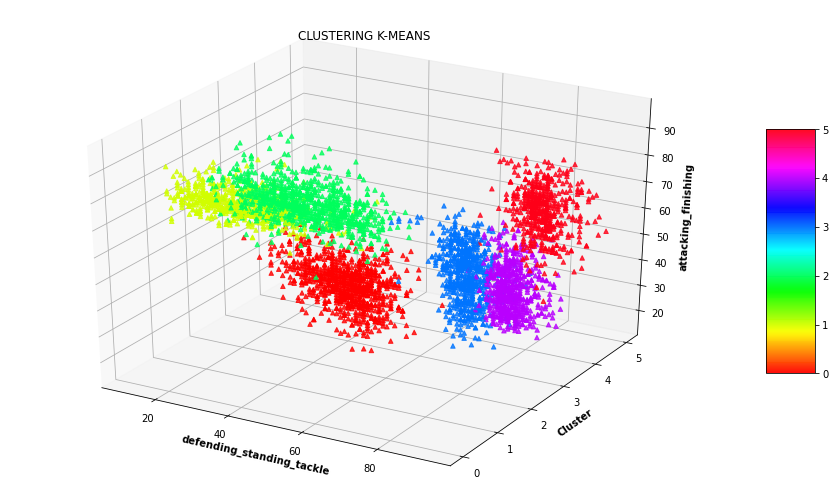

In [ ]:
z = df_clusters['attacking_finishing']
x = df_clusters['defending_standing_tackle']
y = df_clusters['kmeans_6']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (y ),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("CLUSTERING K-MEANS")
ax.set_xlabel('defending_standing_tackle', fontweight ='bold')
ax.set_ylabel('Cluster', fontweight ='bold')
ax.set_zlabel('attacking_finishing', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()


Analizamos cuántos observaciones tiene cada cluster

In [ ]:
df_clusters['kmeans_6'].value_counts()

2    937
0    865
3    701
4    605
1    542
5    499
Name: kmeans_6, dtype: int64

En las siguientes líneas de código, se visualizan las posiciones que se destacan en cada cluster. **Nota: estos clusters pueden cambiar de número por cada nueva ejecución del modelo de K means que se realice**

Así, observamos que, de los 6 clusters, uno está formado principalmente por mediocampistas centrales, otro está integrado principalmente por defensores centrales, otro se conforma fundamentalmente por centro delanteros, otro está integrado por jugadores que puedan jugar en cualquiera de los dos laterales y en el centro de la cancha y otro está compuesto también por mediocampistas centrales pero que presentan habilidades más ofensivas que defensivas.

In [ ]:
df_clusters[df_clusters['kmeans_6'] == 0]['player_positions'].value_counts().head(10)

CM, CDM         118
CM               79
CDM, CM          70
CM, CAM          46
CAM, CM          33
LB               28
CM, CDM, CAM     26
LB, LM           20
RB               19
CM, CAM, CDM     15
Name: player_positions, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_6'] == 1]['player_positions'].value_counts().head(10)

ST            374
ST, CAM        15
ST, RW         14
ST, RM         14
ST, LW         13
ST, CF         13
ST, LM         13
LM, ST          7
ST, LW, RW      7
ST, RW, LW      6
Name: player_positions, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_6'] == 2]['player_positions'].value_counts().head(10)

ST         39
RM, LM     37
CAM, CM    34
LM, RM     32
CAM        25
RW, LW     24
LM         24
RM, RW     22
RM         22
LM, LW     21
Name: player_positions, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_6'] == 3]['player_positions'].value_counts().head(10)

RB         88
LB         87
CDM, CM    59
CB         38
RB, RWB    36
RB, RM     33
LB, LWB    32
LB, LM     27
RB, LB     26
CB, LB     23
Name: player_positions, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_6'] == 4]['player_positions'].value_counts().head(10)

CB            494
CB, RB         31
CB, CDM        24
CB, LB         19
CDM, CM         6
CDM, CB         6
CB, RB, LB      5
CDM             4
LB, CB          2
RB              2
Name: player_positions, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_6'] == 5]['player_positions'].value_counts().head(10)

CDM, CM        165
CB              61
CM, CDM         59
CDM             25
CM              17
CB, CDM         17
CDM, CM, CB     16
CDM, CB         15
RB              12
CB, LB          10
Name: player_positions, dtype: int64

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

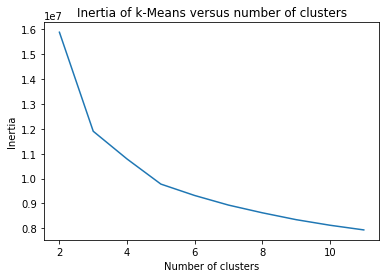

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters.
# Acá observamos que "el codo" marca 5 clusters, por lo que corremos de nuevo eligiendo esa cantidad
scores = [KMeans(n_clusters=i).fit(df_skills_noGK).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
n_clust = 5 #corremos para 5 clusters. Se puede suponer que todos los delanteros (externos e internos) se agruparán en una sola posición

km = KMeans(n_clusters=n_clust)
km.fit(df_skills_noGK)

clusters = km.labels_


In [ ]:
df_clusters=df_noGK.copy()
df_clusters['kmeans_5'] = km.labels_ #clusters

In [ ]:
kmean_clusters = go.Scatter(x=df_skills_noGK[skill_3], y=df_skills_noGK[skill_4],
                           mode='markers',
                        text=df_noGK.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_noGK.loc[bool_crack,skill_3], y=df_skills_noGK.loc[bool_crack,skill_4],name='Ckacks!!',
                      text=df_noGK.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_3),
                yaxis=dict(title=skill_4),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

fig.show(renderer="colab")

In [ ]:
df_clusters['kmeans_5'].value_counts()

4    1056
0     983
1     941
2     623
3     546
Name: kmeans_5, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_5'] == 0]['player_positions'].value_counts().head(10)

CAM, CM    41
ST         39
RM, LM     38
LM, RM     32
CAM        27
RM, RW     25
RW, LW     24
RM         24
LM         24
LM, LW     22
Name: player_positions, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_5'] == 1]['player_positions'].value_counts().head(10)

CDM, CM    135
RB          94
LB          91
CB          81
RB, RWB     36
RB, RM      33
LB, LWB     32
CB, LB      29
RB, LB      27
LB, LM      26
Name: player_positions, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_5'] == 2]['player_positions'].value_counts().head(10)

CB            503
CB, RB         32
CB, CDM        24
CB, LB         21
CDM, CM        10
CDM, CB         6
CDM             5
CB, RB, LB      5
LB, CB          2
RB              2
Name: player_positions, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_5'] == 3]['player_positions'].value_counts().head(10)

ST            374
ST, CAM        15
ST, RW         15
ST, RM         14
ST, LM         14
ST, LW         13
ST, CF         13
ST, LW, RW      7
LM, ST          7
ST, RW, LW      6
Name: player_positions, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_5'] == 4]['player_positions'].value_counts().head(10)

CM, CDM         166
CDM, CM         155
CM               90
CM, CAM          48
CM, CDM, CAM     34
LB               32
CAM, CM          29
RB               25
LB, LM           22
CM, CAM, CDM     18
Name: player_positions, dtype: int64

### Mean-Shift

In [ ]:
ms = MeanShift(bandwidth=20, bin_seeding=True)

ms.fit(df_skills_noGK)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)


Cantidad de clusters encontrados por Mean Shift : 3


Utilizando el método de Mean Shift, el algoritmo encuentra 3 clusters. Nuestra hipótesis es que esos clusters van a estar divididos en 3 posiciones: defensores, mediocampistas y delanteros

Graficamos los resultados

In [ ]:
kmean_clusters = go.Scatter(x=df_skills_noGK[skill_3], y=df_skills_noGK[skill_4],
                           mode='markers',
                        text=df_noGK.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_noGK.loc[bool_crack,skill_3], y=df_skills_noGK.loc[bool_crack,skill_4],name='Ckacks!!',
                      text=df_noGK.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_3),
                yaxis=dict(title=skill_4),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

fig.show(renderer="colab")

In [ ]:
df_clusters['kmeans_3'] = ms.labels_ #clusters

In [ ]:
df_clusters['kmeans_3'].value_counts()

2    2322
0    1114
1     713
Name: kmeans_3, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_3'] == 0]['player_positions'].value_counts().head(10)

CAM, CM    52
RM, LM     42
LM, RM     33
ST         31
CAM        30
CM         29
CM, CDM    26
CM, CAM    25
RM         25
LM         24
Name: player_positions, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_3'] == 1]['player_positions'].value_counts().head(10)

ST            383
ST, LW         23
ST, RM         18
ST, CF         15
ST, CAM        15
ST, LM         14
ST, RW         13
CAM, CM        10
LM, ST         10
ST, LW, RW      7
Name: player_positions, dtype: int64

In [ ]:
df_clusters[df_clusters['kmeans_3'] == 2]['player_positions'].value_counts().head(10)

CB         594
CDM, CM    299
CM, CDM    161
LB         123
RB         114
CM          74
CB, LB      54
CB, RB      51
CB, CDM     46
LB, LM      45
Name: player_positions, dtype: int64

Efectivamente aquí comprobamos por la distribución de las posiciones de los jugadores en cada cluster que las agreupaciones se hicieron entre defensores, mediocampistas y delanteros.

### DBSCAN

Text(0, 0.5, 'Distance')

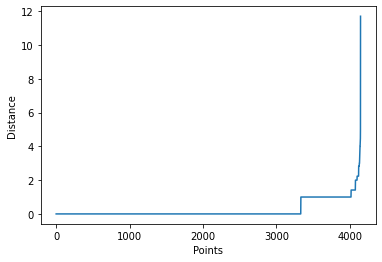

In [ ]:
#BUSCAR EPSILON
k = 2
data_nn = df_noGK.copy()[['defending_standing_tackle', 'attacking_finishing']]

# Calculate NN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(
    x = i, 
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

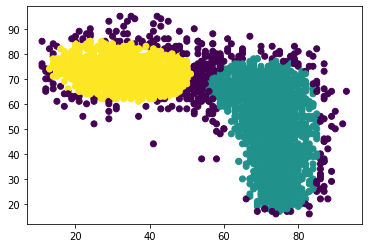

In [ ]:
df_noGK['dbscan'] = DBSCAN(eps=6, min_samples=200).fit_predict(df_noGK[['defending_standing_tackle', 'attacking_finishing']])
plt.scatter(
    df_noGK['defending_standing_tackle'],
    df_noGK['attacking_finishing'],
    c = df_noGK['dbscan']
    #c = df_n['Position3']
    
)

In [ ]:
df_noGK['dbscan'].value_counts()

 0    2519
 1    1220
-1     410
Name: dbscan, dtype: int64

En este caso, el algoritmo DBSCAN encuentra 3 clusters.

In [ ]:
df_noGK[df_noGK['dbscan'] == 0]['player_positions'].value_counts().head(10)

CB         555
CDM, CM    292
CM, CDM    173
LB         124
RB         119
CM          89
CB, LB      54
CB, RB      50
LB, LM      47
RB, RWB     45
Name: player_positions, dtype: int64

In [ ]:
df_noGK[df_noGK['dbscan'] == -1]['player_positions'].value_counts().head(10)

ST         50
CB         39
CAM, CM    30
CM, CDM    16
CM         15
RM, LM     10
CAM, LM     8
CAM         8
ST, RM      8
CDM, CM     8
Name: player_positions, dtype: int64

In [ ]:
df_noGK[df_noGK['dbscan'] == 1]['player_positions'].value_counts().head(10)

ST        363
RM, LM     32
LM, RM     30
LM         21
CAM        21
ST, LW     21
RM         20
LM, LW     20
RM, RW     20
ST, RM     19
Name: player_positions, dtype: int64

##  4.-Evaluación y análisis de los clusters encontrados

 - **K-Means**: en primer lugar elegimos buscar 6 clusters tomando como criterios las distitnas posiciones que consideramos que puede tener un jugador dentro de un campo de acuerdo a las distintas habilidades que encontramos en el dataset. Allí observamos cómo se separaban los clusters tomando de a dos habilidades por vez, diferenciándose claramente los jugadores ofensivos de los defensivos.
 Analizando dentro de cada cluster pudimos ver que nuestro criterio de separación no era tan errado, ya que la clusterización por habilidades nos permitió obtener:

1. un cluster formado principalmente por mediocampistas centrales.
2. un cluster formado principalmente por defensores centrales.
3. un cluster formado principalmente por centro delanteros.
4. un cluster formado principalmente por mediocampistas centrales pero que presentan habilidades más ofensivas que defensivas.
5. un cluster está integrado por jugadores que puedan jugar en cualquiera de los dos laterales y en el centro de la cancha.
6. un cluster formado por delanteros y volantes externos.

Luego, por el método "elbow", encontramos que la cantidad óptima de clusters puede ser 5, así que repetimos el proceso. Los resultados fueron similares, agrupánndose en este caso volantes y defenseores laterales en un mismo cluster.

- **Mean-Shift**: encontró 3 clusters distintos. Realizamos un análisis visual y por cluster como se hizo con el método anterior y concluimos que los clusters estaban conformados por defensores, mediocampistas y delanteros.

- **DBSCAN**: También se encontraron 3 grupos distintos. En este caso, debido a los parámetros elegidos de distancia (eps) y min_points, los grupos finalmente se dividieron en:
 1. defensores y mediocampistas defensivos.
 2. mediocampistas ofensivos y delanteros.
 3. el resto podría interpretarse como outliers que no llegaron a formar parte de ninguno de los dos clusters anteriores por no cumplir con los criterios de distancia.




## 5.-Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?

A nuestro entender, no fue necesario realizar ningún tipo de normalización o esacalado de la base ya que las variables utilizadas para la clusterización estaban en escala 0 - 100 en el dataset, es decir en el mismo orden de magnitud. Por ende, no se justificaba aplicar niguna técnica de normalización o escalado adicionales.

## 6.- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

Utilizaremos PCA para generar los componentes principales. En primer lugar, quitaremos las habilidades vinculadas a los arqueros.

In [ ]:
df_pca = df.copy()

In [ ]:
train = df_pca.select_dtypes(['number'])  

In [ ]:
train = train.drop(['goalkeeping_speed', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes' ], axis=1)
train = train.drop(['nation_team_id', 'nation_jersey_number'], axis=1)

In [ ]:
train

sofifa_id  overall  potential    value_eur  wage_eur  age  height_cm  \
0         158023       93         93   78000000.0  320000.0   34        170   
1         188545       92         92  119500000.0  270000.0   32        185   
2          20801       91         91   45000000.0  270000.0   36        187   
3         190871       91         91  129000000.0  270000.0   29        175   
4         192985       91         91  125500000.0  350000.0   30        181   
...          ...      ...        ...          ...       ...  ...        ...   
19234     261962       47         52      70000.0    1000.0   22        180   
19235     262040       47         59     110000.0     500.0   19        175   
19236     262760       47         55     100000.0     500.0   21        178   
19237     262820       47         60     110000.0     500.0   19        173   
19238     264540       47         60     110000.0     500.0   19        167   

       weight_kg  club_team_id  league_level  club_jersey_number  \
0             72          73.0           1.0                30.0   
1             81          21.0           1.0                 9.0   
2             83          11.0           1.0                 7.0   
3             68          73.0           1.0                10.0   
4             70          10.0           1.0                17.0   
...          ...           ...           ...                 ...   
19234         64      112541.0           1.0                36.0   
19235         70         445.0           1.0                27.0   
19236         72      111131.0           1.0                31.0   
19237         66      111131.0           1.0                12.0   
19238         61      113040.0           1.0                13.0   

       club_contract_valid_until  nationality_id  weak_foot  skill_moves  \
0                         2023.0              52          4            4   
1                         2023.0              37          4            4   
2                         2023.0              38          4            5   
3                         2025.0              54          5            5   
4                         2025.0               7          5            4   
...                          ...             ...        ...          ...   
19234                     2021.0             155          3            2   
19235                     2021.0              25          3            2   
19236                     2021.0              25          3            2   
19237                     2021.0              25          3            2   
19238                     2025.0             159          3            2   

       international_reputation  release_clause_eur  pace  shooting  passing  \
0                             5         144300000.0  85.0      92.0     91.0   
1                             5         197200000.0  78.0      92.0     79.0   
2                             5          83300000.0  87.0      94.0     80.0   
3                             5         238700000.0  91.0      83.0     86.0   
4                             4         232200000.0  76.0      86.0     93.0   
...                         ...                 ...   ...       ...      ...   
19234                         1            114000.0  58.0      35.0     46.0   
19235                         1            193000.0  59.0      39.0     50.0   
19236                         1            175000.0  60.0      37.0     45.0   
19237                         1            239000.0  68.0      46.0     36.0   
19238                         1            217000.0  68.0      38.0     45.0   

       dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0           95.0       34.0    65.0                  85                   95   
1           86.0       44.0    82.0                  71                   95   
2           88.0       34.0    75.0                  87                   95   
3           94.0       37.0    63.0            

Realizamos la estandarización de los datos.

In [ ]:
train = StandardScaler().fit_transform(train)
train = pd.DataFrame(train).dropna()

In [ ]:
pca = PCA(n_components=3) #elegimos 3 componentes
pca_res = pca.fit_transform(train)
train.head(3)

0         1        2          3          4         5         6   \
0 -2.716263  3.957501  3.60178   9.870564  15.972640  1.851089 -1.646467   
1 -1.587450  3.812154  3.43747  15.321406  13.404543  1.429869  0.539166   
2 -7.791226  3.666806  3.27316   5.536158  13.404543  2.272309  0.830584   

         7         8         9         10        11        12        13  \
0 -0.416315 -0.928439 -0.473847  0.505601  0.194531 -0.131273  1.569295   
1  0.856805 -0.929395 -0.473847 -0.667001  0.194531 -0.429500  1.569295   
2  1.139720 -0.929579 -0.473847 -0.778677  0.194531 -0.409618  1.569295   

         14         15         16        17        18        19        20  \
0  2.146241  10.525295   9.293978  1.535460  2.822155  3.345768  3.361178   
1  2.146241  10.525295  12.832924  0.895187  2.822155  2.153952  2.428635   
2  3.448937  10.525295   5.213152  1.718395  2.964492  2.253270  2.635866   

         21        22        23        24        25        26        27  \
0 -1.093541  0.018047  1.964190  2.490076  1.053337  2.217457  2.579532   
1 -0.475848  1.754229  1.187887  2.490076  2.209825  1.803392  2.636180   
2 -1.093541  1.039331  2.075090  2.490076  2.209825  1.458338  2.466236   

         28        29        30        31        32        33        34  \
0  2.147538  2.515375  3.012606  2.524112  2.252136  1.737133  1.021387   
1  1.561936  1.745324  2.488684  1.126551  1.772039  0.814077  0.954565   
2  1.721646  1.855332  2.430471  1.592404  1.772039  1.341538  1.555967   

         35        36        37        38        39        40        41  \
0  1.850364  3.599846  2.159347  2.139433  0.262854  0.552196  0.315265   
1  0.908358  3.489252  1.251806  2.442649  1.665187  0.799952  1.657738   
2  1.513933  3.599846  0.693319  2.745866  2.490088  0.861892  0.947017   

         42        43        44        45        46        47        48  \
0  2.439705 -0.679892 -0.319857  2.174690  3.006228  1.721270  3.131025   
1  2.079086  1.500202  0.115418  2.276621  1.980597  2.672553  2.473077   
2  2.388188  0.439616 -0.851861  2.276621  1.614300  2.545715  3.048782   

         49        50        51  
0 -1.316900 -0.614426 -1.055483  
1 -0.574336 -0.284737 -1.296387  
2 -1.118883 -0.755721 -1.055483

In [ ]:
df_pca_comp= pd.DataFrame(data= pca.components_, columns= train.columns.values, index=['Component 1', 'Component 2', 'Component 3'])

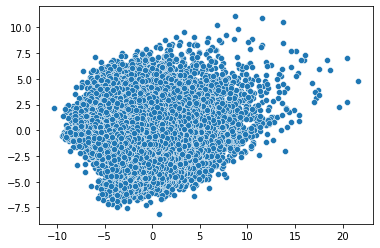

In [ ]:
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], palette = sns.hls_palette(10), legend = 'full');

In [ ]:
scores_pca= pca.transform(train)

In [ ]:
wcss_pca=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss_pca.append(kmeans_pca.inertia_)

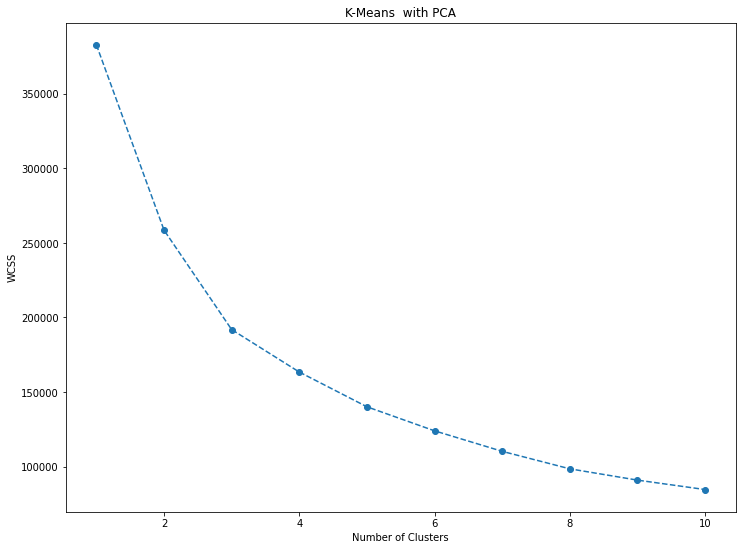

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss_pca, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means  with PCA")
plt.show()

Por el método del "codo", seleccionamos 4 clusters. Realizamos un gráfico de dispersión para observar cómo afectan las dos primeras componentes principales a los clusters elegidos.

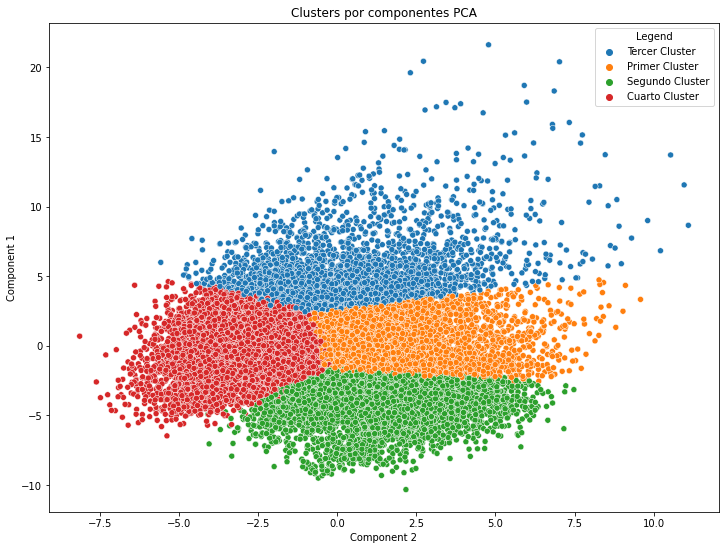

In [ ]:
#K-Means clustering with PCA results
kmeans_pca=KMeans(n_clusters= 4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

df_segm_pca_kmeans= pd.concat([df_n.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3: ]= ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment k-means PCA']= kmeans_pca.labels_
df_segm_pca_kmeans_freq= df_segm_pca_kmeans.groupby(['Segment k-means PCA']).mean()
"""
df_segm_pca_kmeans_freq['N-obs']=df_segm_pca_kmeans[['Sex','Segment k-means PCA']].groupby(['Segment k-means PCA']).count()
df_segm_pca_kmeans_freq['Prop-obs']=df_segm_pca_kmeans_freq['N-obs']/df_segm_pca_kmeans_freq['N-obs'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'Standard',1:'Career Focussed',2: 'Fewer Opportunities',3:'Well off'})
df_segm_pca_kmeans_freq
"""
df_segm_pca_kmeans['Legend']= df_segm_pca_kmeans['Segment k-means PCA'].map({0:'Primer Cluster',1:'Segundo Cluster',2: 'Tercer Cluster',3:'Cuarto Cluster'})
plt.figure(figsize=(12,9))
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'])
#sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'], palette=['g','r','c','m'])
plt.title('Clusters por componentes PCA')
plt.show()

Hacemos el mismo análisis considerando ahora solo 3 clusters.

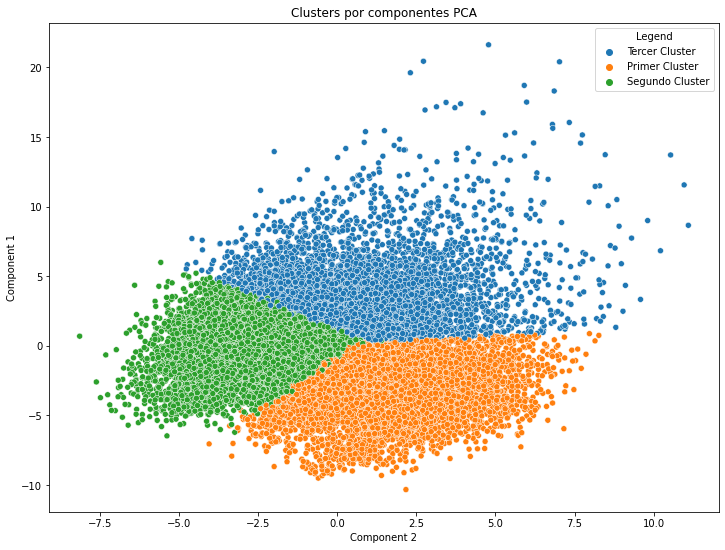

In [ ]:
#K-Means clustering with PCA results and n_cluster = 3
kmeans_pca=KMeans(n_clusters= 3, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

df_segm_pca_kmeans= pd.concat([df_n.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3: ]= ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment k-means PCA']= kmeans_pca.labels_
df_segm_pca_kmeans_freq= df_segm_pca_kmeans.groupby(['Segment k-means PCA']).mean()
"""
df_segm_pca_kmeans_freq['N-obs']=df_segm_pca_kmeans[['Sex','Segment k-means PCA']].groupby(['Segment k-means PCA']).count()
df_segm_pca_kmeans_freq['Prop-obs']=df_segm_pca_kmeans_freq['N-obs']/df_segm_pca_kmeans_freq['N-obs'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'Standard',1:'Career Focussed',2: 'Fewer Opportunities',3:'Well off'})
df_segm_pca_kmeans_freq
"""
df_segm_pca_kmeans['Legend']= df_segm_pca_kmeans['Segment k-means PCA'].map({0:'Primer Cluster',1:'Segundo Cluster',2: 'Tercer Cluster',3:'Cuarto Cluster'})
plt.figure(figsize=(12,9))
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'])
#sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'], palette=['g','r','c','m'])
plt.title('Clusters por componentes PCA')
plt.show()

In [ ]:
df_segm_pca_kmeans

sofifa_id                                         player_url  \
0       158023.0  https://sofifa.com/player/158023/lionel-messi/...   
1       188545.0  https://sofifa.com/player/188545/robert-lewand...   
2        20801.0  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3       190871.0  https://sofifa.com/player/190871/neymar-da-sil...   
4       192985.0  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
16015        NaN                                                NaN   
16016        NaN                                                NaN   
16017        NaN                                                NaN   
16018        NaN                                                NaN   
16019        NaN                                                NaN   

              short_name                            long_name  \
0               L. Messi       Lionel Andrés Messi Cuccittini   
1         R. Lewandowski                   Robert Lewandowski   
2      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3              Neymar Jr        Neymar da Silva Santos Júnior   
4           K. De Bruyne                      Kevin De Bruyne   
...                  ...                                  ...   
16015                NaN                                  NaN   
16016                NaN                                  NaN   
16017                NaN                                  NaN   
16018                NaN                                  NaN   
16019                NaN                                  NaN   

      player_positions  overall  potential    value_eur  wage_eur   age  \
0           RW, ST, CF     93.0       93.0   78000000.0  320000.0  34.0   
1                   ST     92.0       92.0  119500000.0  270000.0  32.0   
2               ST, LW     91.0       91.0   45000000.0  270000.0  36.0   
3              LW, CAM     91.0       91.0  129000000.0  270000.0  29.0   
4              CM, CAM     91.0       91.0  125500000.0  350000.0  30.0   
...                ...      ...        ...          ...       ...   ...   
16015              NaN      NaN        NaN          NaN       NaN   NaN   
16016              NaN      NaN        NaN          NaN       NaN   NaN   
16017              NaN      NaN        NaN          NaN       NaN   NaN   
16018              NaN      NaN        NaN          NaN       NaN   NaN   
16019              NaN      NaN        NaN          NaN       NaN   NaN   

              dob  height_cm  weight_kg  club_team_id            club_name  \
0      1987-06-24      170.0       72.0          73.0  Paris Saint-Germain   
1      1988-08-21      185.0       81.0          21.0    FC Bayern München   
2      1985-02-05      187.0       83.0          11.0    Manchester United   
3      1992-02-05      175.0       68.0          73.0  Paris Saint-Germain   
4      1991-06-28      181.0       70.0          10.0      Manchester City   
...           ...        ...        ...           ...                  ...   
16015         NaN        NaN        NaN           NaN                  NaN   
16016         NaN        NaN        NaN           NaN                  NaN   
16017         NaN        NaN        NaN           NaN                  NaN   
16018         NaN        NaN        NaN           NaN                  NaN   
16019         NaN        NaN        NaN           NaN                  NaN   

                  league_name  league_level club_position  club_jersey_number  \
0              French Ligue 1           1.0            RW                30.0   
1        German 1. Bundesliga           1.0            ST                 9.0   
2      English Premier League           1.0            ST                 7.0   
3              French Ligue 1           1.0            LW                10.0   
4      English Premier League           1.0           RCM                17.0   
...                       ...           ...      

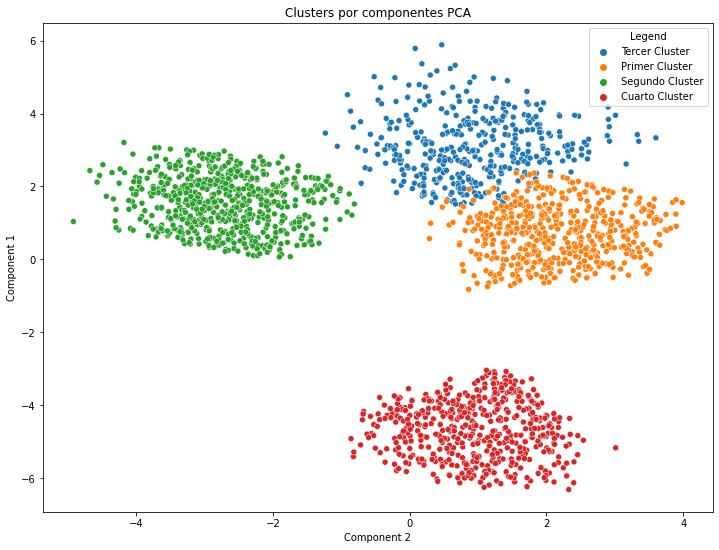

In [ ]:
#K-Means clustering with PCA results
kmeans_pca=KMeans(n_clusters= 40, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

df_segm_pca_kmeans= pd.concat([df_n.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3: ]= ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment k-means PCA']= kmeans_pca.labels_
df_segm_pca_kmeans_freq= df_segm_pca_kmeans.groupby(['Segment k-means PCA']).mean()
"""
df_segm_pca_kmeans_freq['N-obs']=df_segm_pca_kmeans[['Sex','Segment k-means PCA']].groupby(['Segment k-means PCA']).count()
df_segm_pca_kmeans_freq['Prop-obs']=df_segm_pca_kmeans_freq['N-obs']/df_segm_pca_kmeans_freq['N-obs'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'Standard',1:'Career Focussed',2: 'Fewer Opportunities',3:'Well off'})
df_segm_pca_kmeans_freq
"""
df_segm_pca_kmeans['Legend']= df_segm_pca_kmeans['Segment k-means PCA'].map({0:'Primer Cluster',1:'Segundo Cluster',2: 'Tercer Cluster',3:'Cuarto Cluster'})
plt.figure(figsize=(12,9))
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'])
#sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'], palette=['g','r','c','m'])
plt.title('Clusters por componentes PCA')
plt.show()

In [ ]:
df_noGK["player_positions"].str.split(',').str[0]

0        RW
1        ST
2        ST
3        LW
4        CM
       ... 
4588     CM
4589     CM
4590     RB
4591     ST
4592    CDM
Name: player_positions, Length: 4149, dtype: object

In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

df_noGK["Position2"]=df_noGK["player_positions"].str.split(',').str[0].apply(lambda x: pos2(x))

dict_replace = {'Defender' : 1, 'Forward' : 3, 'GK' : 0, 'Midfielder' : 2}
df_noGK['Position3'] = df_noGK['Position2']
df_noGK.replace({"Position3": dict_replace}, inplace=True)

df_noGK["Position3"].value_counts()

1    1485
3    1332
2    1332
Name: Position3, dtype: int64

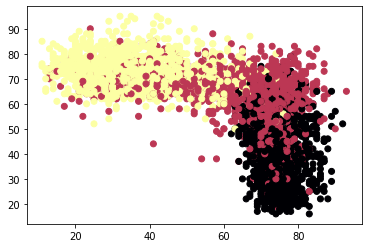

In [ ]:
#grafico por posición:
# 'Defender' : 1, 'Forward' : 3, 'GK' : 0, 'Midfielder' : 2}

plt.scatter(
    df_noGK['defending_standing_tackle'],
    df_noGK['attacking_finishing'],
    c = df_noGK['Position3'],
    #c = df_n['Position3']==2,  #ARQUEROS
    cmap='inferno'  #'Set1' 'viridis'
)

In [ ]:
# APLICAMOS T-SNE

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_skills_noGK)
df_skills_noGK['pca-one'] = pca_result[:,0]
df_skills_noGK['pca-two'] = pca_result[:,1] 
df_skills_noGK['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.49359975 0.17920098 0.09387351]


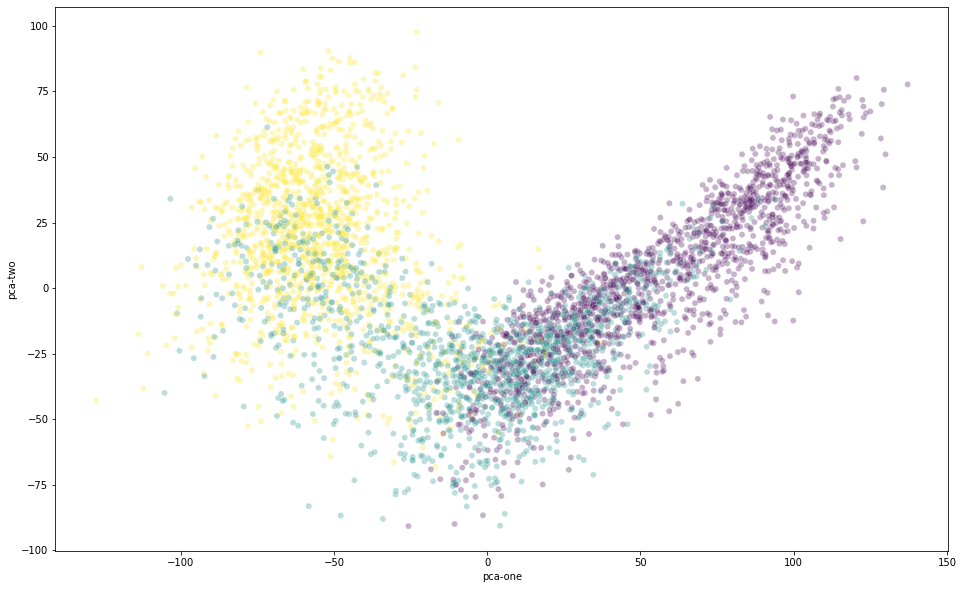

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    c = df_noGK['Position3'],
    palette=sns.color_palette("hls", 10),
    data=df_skills_noGK,
    legend="full",
    alpha=0.3
)

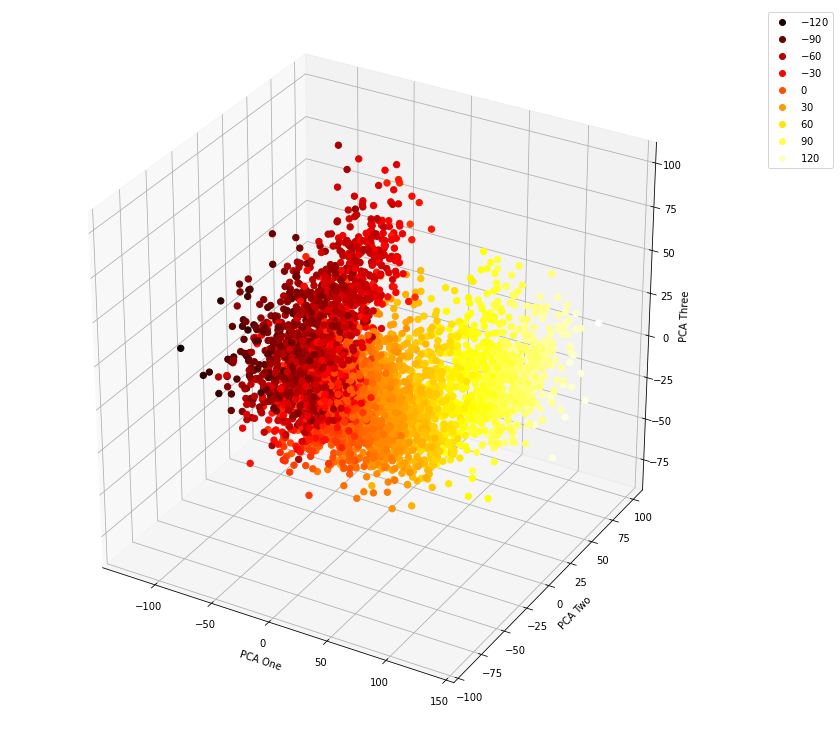

In [ ]:
x = df_skills_noGK['pca-one']
y = df_skills_noGK['pca-two']
z = df_skills_noGK['pca-three']

# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
#sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap='hot', alpha=1)
ax.set_xlabel('PCA One')
ax.set_ylabel('PCA Two')
ax.set_zlabel('PCA Three')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.show()


In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_skills_noGK)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4149 samples in 0.000s...
[t-SNE] Computed neighbors for 4149 samples in 0.698s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4149
[t-SNE] Computed conditional probabilities for sample 2000 / 4149
[t-SNE] Computed conditional probabilities for sample 3000 / 4149
[t-SNE] Computed conditional probabilities for sample 4000 / 4149
[t-SNE] Computed conditional probabilities for sample 4149 / 4149
[t-SNE] Mean sigma: 18.116058
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.709320
[t-SNE] KL divergence after 300 iterations: 1.972037


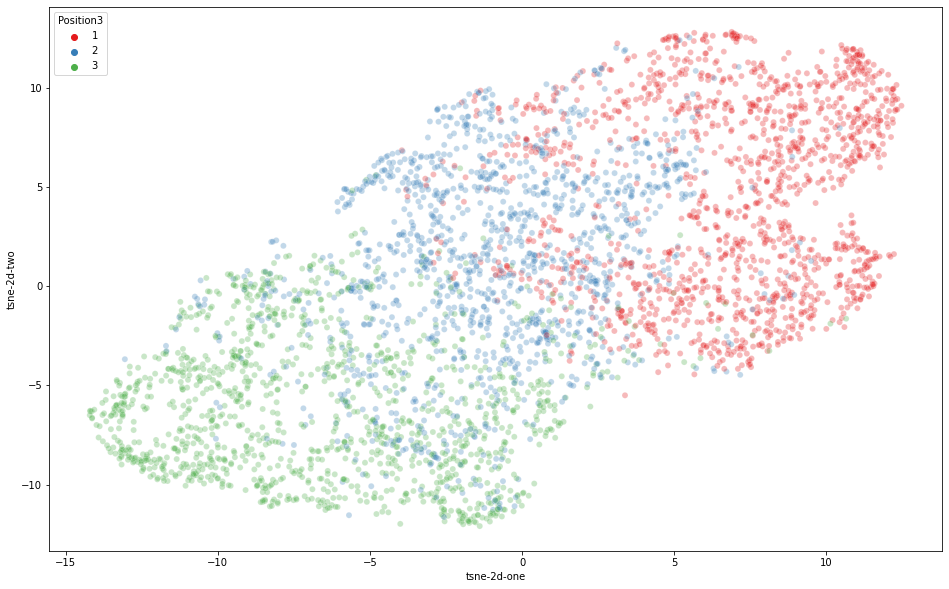

In [ ]:
df_skills_noGK['tsne-2d-one'] = tsne_results[:,0]
df_skills_noGK['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue = df_noGK['Position3'],  # 'Defender' : 1, 'Forward' : 3, 'GK' : 0, 'Midfielder' : 2}
    palette=sns.color_palette("Set1",3),
    data=df_skills_noGK,
    legend="full",
    alpha=0.3
)

In [ ]:
#PRUEBA 3D
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_skills_noGK)

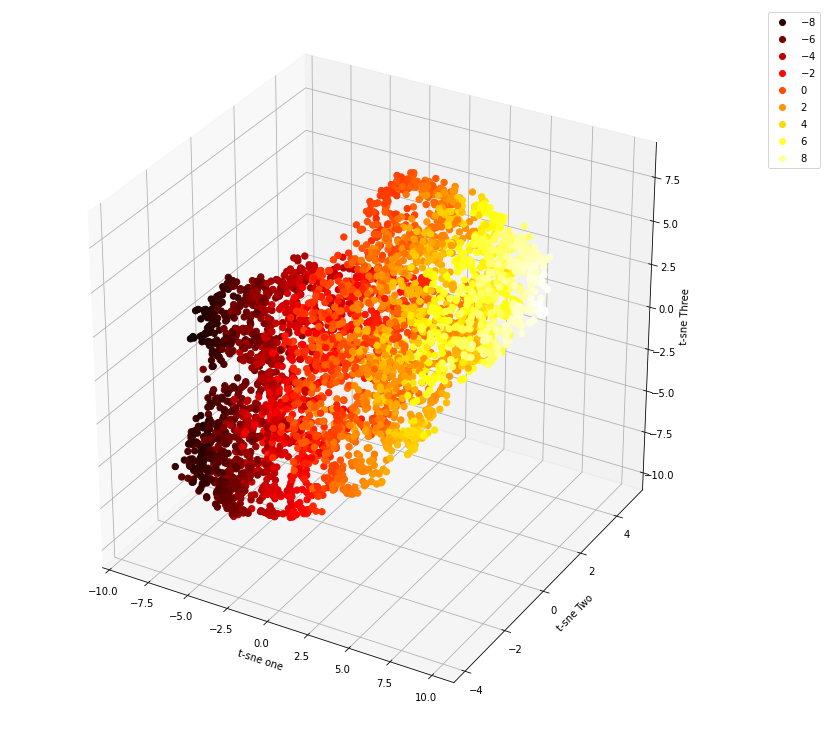

In [ ]:
x = df_skills_noGK['tsne-3d-one'] = tsne_results[:,0]
y = df_skills_noGK['tsne-3d-two'] = tsne_results[:,1]
z = df_skills_noGK['tsne-3d-three'] = tsne_results[:,2]

# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
# sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap='hot', alpha=1)
ax.set_xlabel('t-sne one')
ax.set_ylabel('t-sne Two')
ax.set_zlabel('t-sne Three')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.show()

In [ ]:
fig = px.scatter_3d(df_skills_noGK, x='tsne-3d-one', y='tsne-3d-two', z='tsne-3d-three',
                    color=df_noGK['Position3']
                    #symbol='Position3'
                    )
fig.show(renderer='colab')

- **Conclusiones**: 

Visualmente puede inferirse que tanto con T-SNE o PCA no es posible diferenciar claramente los clusters según la posición: forwards,
midfielders, defenders.

Es probable que existan jugadores con ambivalencias (en cuanto a la posición) y por ello resulta dificil diferenciarlos fácilmente.
